In [6]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

Import required modules and read our data into a pandas dataframe

In [7]:
acrime_df = pd.read_csv("ac_data.csv")

To take a look at few entries of the dataframe

In [69]:
acrime_df.head()

,unique_key,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,longitude,location,location_description,primary_type,timestamp,x_coordinate,y_coordinate,year,zipcode
0,20165052512,"Austin, TX",NaN,NaN,NaN,NaN,SEXUAL ASSAULT OF CHILD/OBJECT,UK,NaN,NaN,NaN,NaN,Rape,2016-12-21 00:00:00 UTC,NaN,NaN,2016,NaN
1,2016250988,"Austin, TX",NaN,2016-09-16 00:00:00 UTC,Not cleared,NaN,RAPE,UK,NaN,NaN,NaN,NaN,Rape,2016-01-25 00:00:00 UTC,NaN,NaN,2016,NaN
2,20162050194,"Austin, TX",NaN,2016-09-15 00:00:00 UTC,Cleared by Arrest,NaN,AGG RAPE,UK,NaN,NaN,NaN,NaN,Rape,2016-07-23 00:00:00 UTC,NaN,NaN,2016,NaN
3,20155055814,"Austin, TX",NaN,2016-02-25 00:00:00 UTC,Not cleared,NaN,RAPE OF A CHILD,UK,NaN,NaN,NaN,NaN,Rape,2015-12-22 00:00:00 UTC,NaN,NaN,2015,NaN
4,20161160159,"Austin, TX",NaN,2016-11-10 00:00:00 UTC,Cleared by Exception,NaN,SEXUAL ASSAULT OF CHILD/OBJECT,UK,NaN,NaN,NaN,NaN,Rape,2016-04-25 00:00:00 UTC,NaN,NaN,2016,NaN


df.info() is used to give column type and number of entries that are not null. This will help us see how much of the data is missing.

In [70]:
acrime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116674 entries, 0 to 116673
Data columns (total 18 columns):
unique_key               116674 non-null int64
address                  116674 non-null object
census_tract             116151 non-null float64
clearance_date           111560 non-null object
clearance_status         111560 non-null object
council_district_code    115999 non-null float64
description              116674 non-null object
district                 116674 non-null object
latitude                 34500 non-null float64
longitude                34500 non-null float64
location                 34500 non-null object
location_description     114873 non-null object
primary_type             116674 non-null object
timestamp                116674 non-null object
x_coordinate             114527 non-null float64
y_coordinate             114527 non-null float64
year                     116674 non-null int64
zipcode                  116151 non-null float64
dtypes: float64(7), int

To get a five number summary of numerical atrributes we use describe()

In [71]:
acrime_df.describe()

,unique_key,census_tract,council_district_code,latitude,longitude,x_coordinate,y_coordinate,year,zipcode
count,1.166740e+05,116151.000000,115999.000000,34500.000000,34500.000000,1.145270e+05,1.145270e+05,116674.000000,116151.000000
mean,1.779134e+10,64.865955,5.146863,30.292623,-97.737027,3.116161e+06,1.008001e+07,2014.972736,78732.906880
std,1.668869e+10,630.736787,2.786333,0.075921,0.046538,1.067811e+05,3.386096e+04,0.817715,25.823251
min,2.014200e+04,1.010000,1.000000,30.088110,-97.958825,3.040396e+06,1.001032e+07,2014.000000,78610.000000
25%,2.014332e+10,15.040000,3.000000,30.232364,-97.760883,3.107645e+06,1.005775e+07,2014.000000,78721.000000
50%,2.015238e+10,18.230000,5.000000,30.278712,-97.733608,3.116718e+06,1.007546e+07,2015.000000,78744.000000
75%,2.016158e+10,23.070000,8.000000,30.353641,-97.704639,3.126219e+06,1.010230e+07,2016.000000,78752.000000
max,2.015153e+12,9800.000000,10.000000,30.512564,-97.580845,3.889524e+07,1.625177e+07,2016.000000,78759.000000


The total number of crimes commited by attribute gives a useful insight.

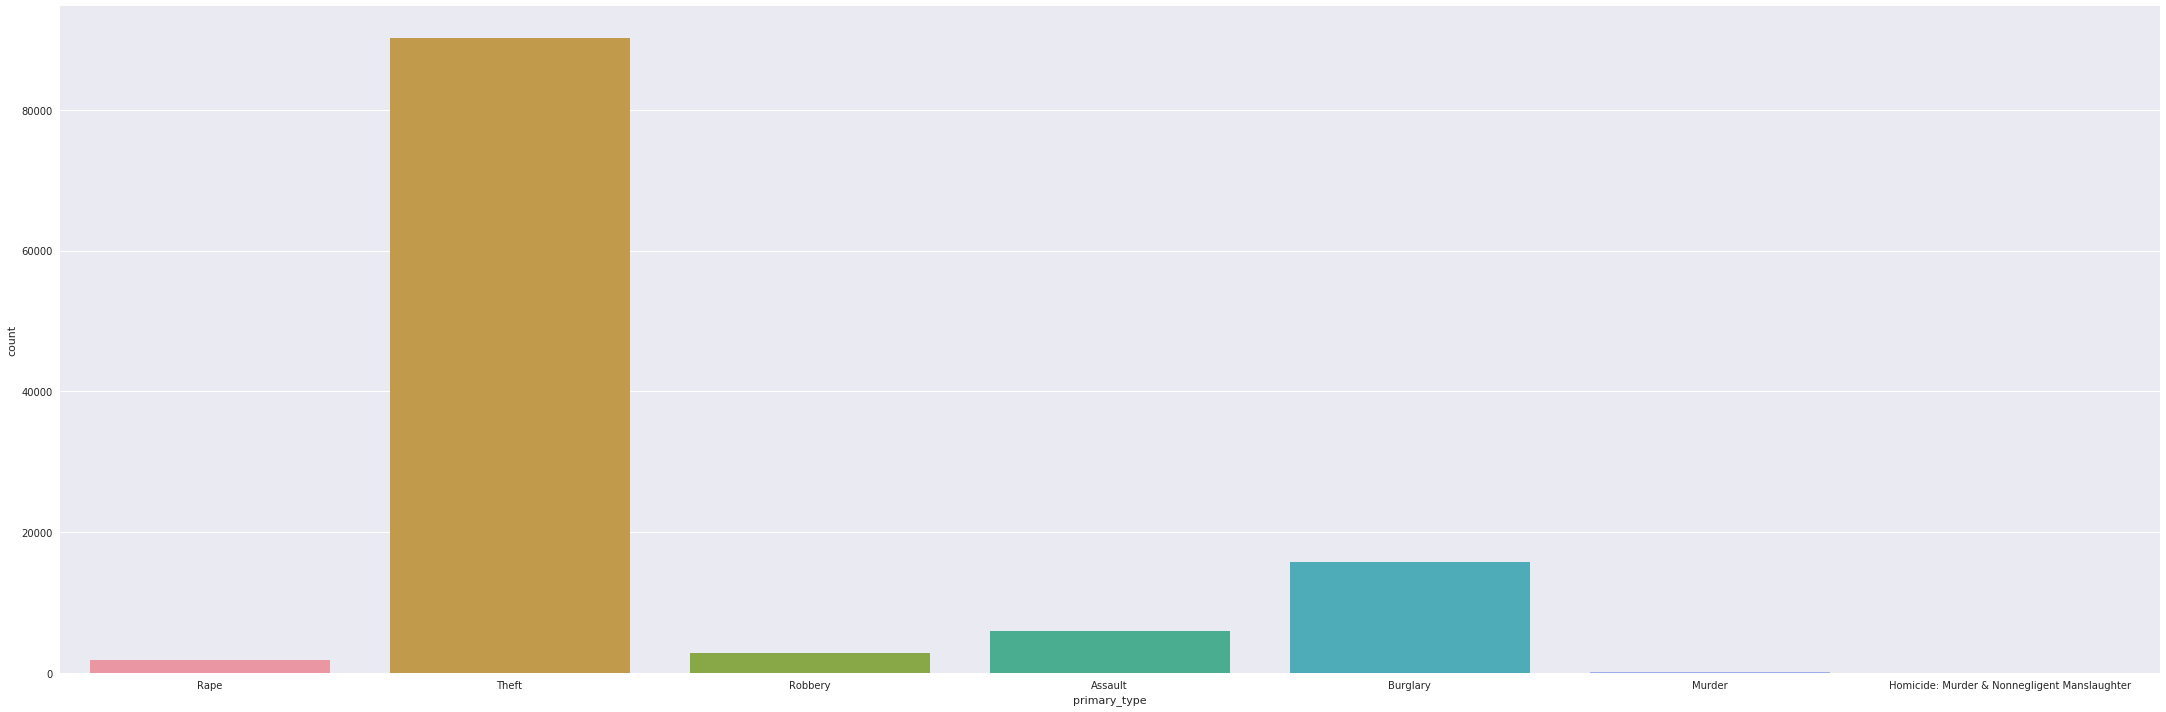

In [72]:
sns.factorplot('primary_type',data=acrime_df,kind='count', size=10, aspect=3)

Number of crimes in each year. We  notice that it has reduced over the years but not an extreme change

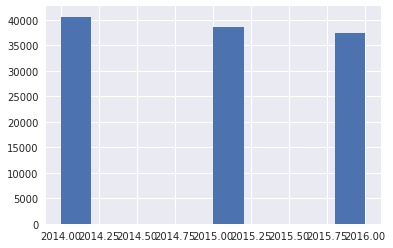

In [73]:
acrime_df['year'].hist()

Number of crimes by district. We notice that some districts have very low rate of crime compared to others. This gives an idea that location of report is important if we want to predict the nature of crime.

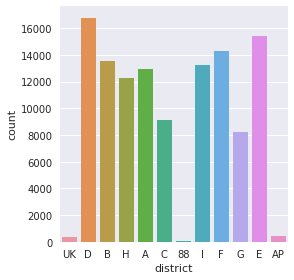

In [74]:
sns.factorplot('district', data=acrime_df, kind='count',aspect=1)

We plot the status of crime reports by count and notice that most of the crimes do not get solved.

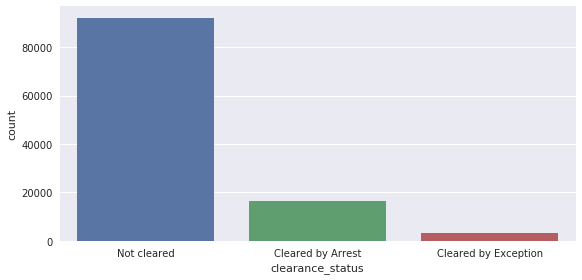

In [75]:
sns.factorplot('clearance_status', data=acrime_df, kind='count', aspect=2)

Next visualization shows the distribution of nature of crime by zipcode. Notice how much the overall number of crimes is very different in different areas and how some type of crimes have a very low probability of happening in a certain area.

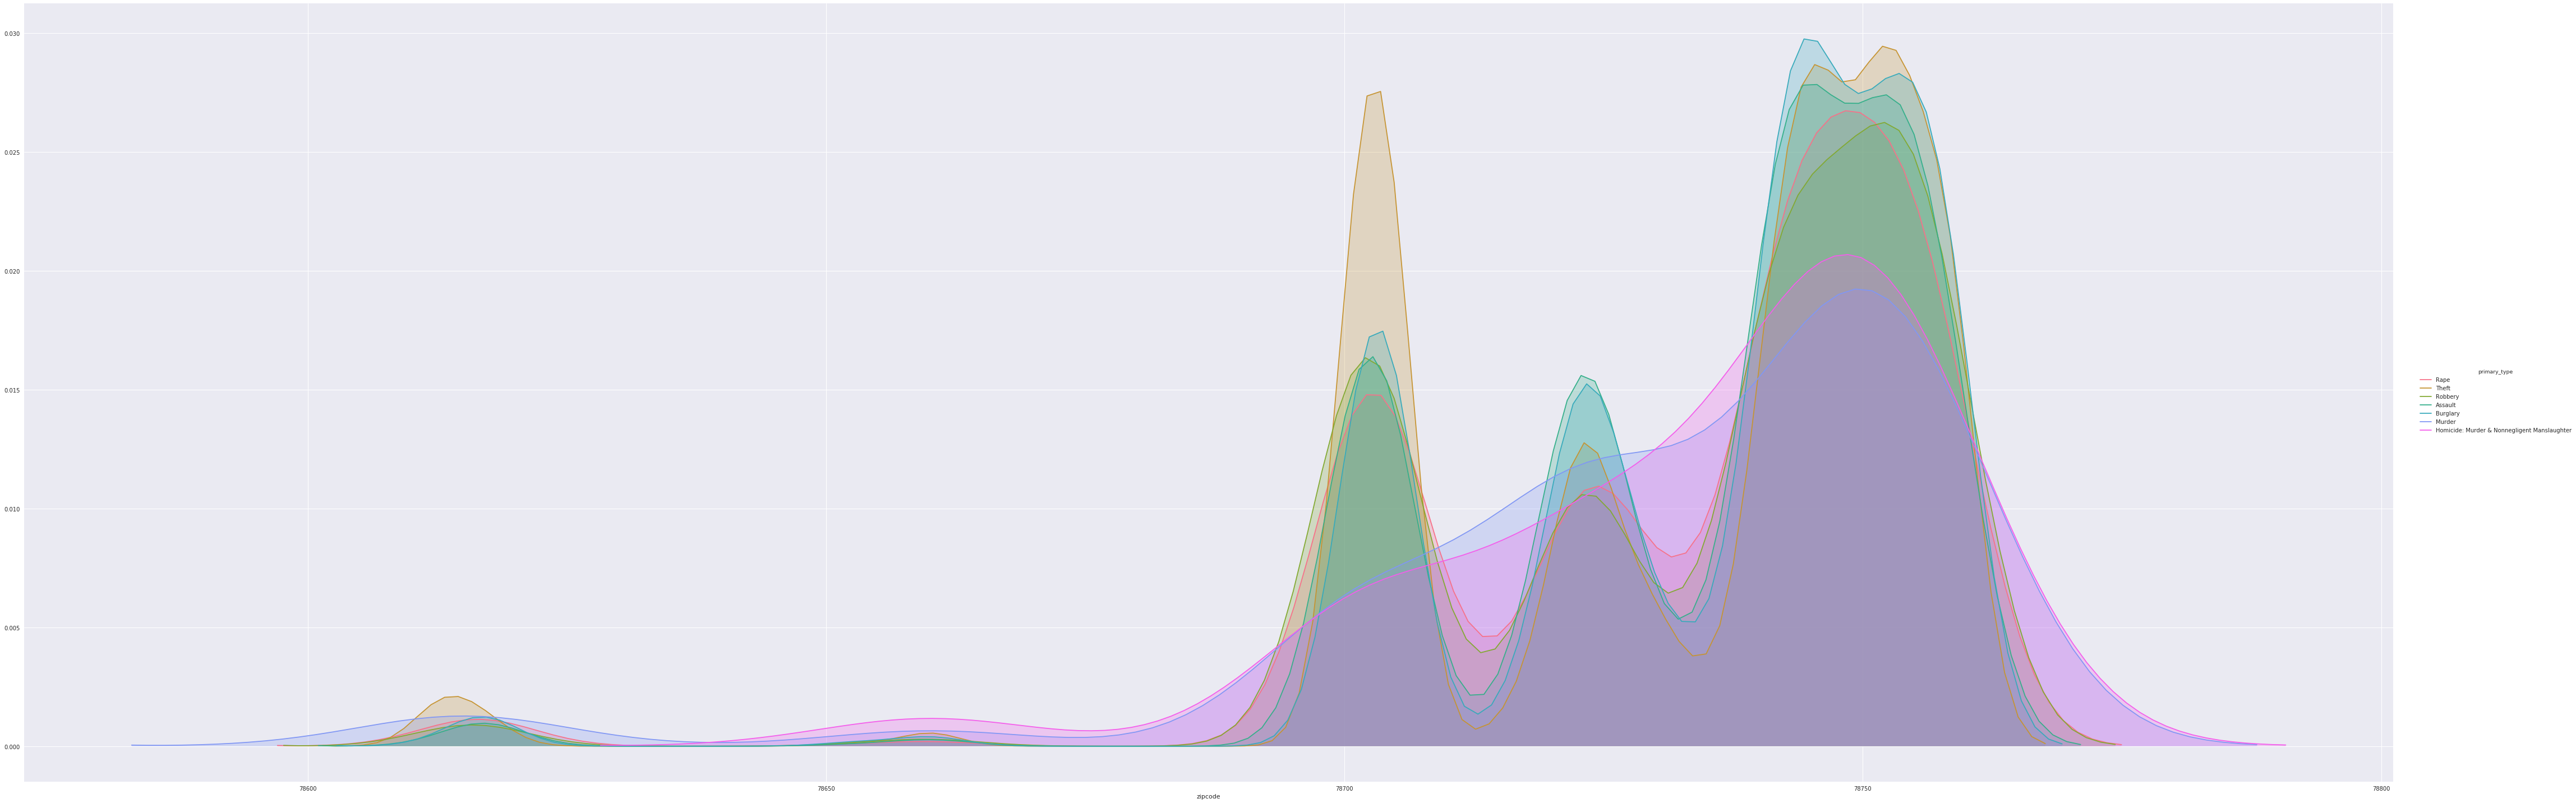

In [76]:
fig = sns.FacetGrid(acrime_df,hue='primary_type',size=20,aspect=3)
fig.map(sns.kdeplot,'zipcode',shade=True)

fig.add_legend()